<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/DL_ASSIGNMENT_Q3_20MAI0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# RAJIT BASU_20MAI0019
# Github link

https://github.com/rajitbasu/Deep_Learning/blob/main/DL_ASSIGNMENT_Q3_20MAI0019.ipynb


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np

In [12]:
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


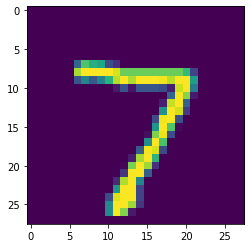

In [14]:
plt.imshow(test_img[0])

In [15]:
train_img = train_img.reshape(60000, 28,28,1)
test_img = test_img.reshape(10000,28,28,1)

In [16]:
train_lab_one_hot = to_categorical(train_lab)
test_lab_one_hot = to_categorical(test_lab)
print(train_lab_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
#Building Model
model=Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [18]:
#Compiling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
hist = model.fit(train_img, train_lab_one_hot,validation_data=(test_img, test_lab_one_hot),
                 epochs=3)

Epoch 1/3
1875/1875 [==============================] - 143s 76ms/step - loss: 0.6332 - accuracy: 0.9192 - val_loss: 0.0931 - val_accuracy: 0.9741
Epoch 2/3
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0593 - accuracy: 0.9824 - val_loss: 0.0724 - val_accuracy: 0.9792
Epoch 3/3
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0867 - val_accuracy: 0.9787


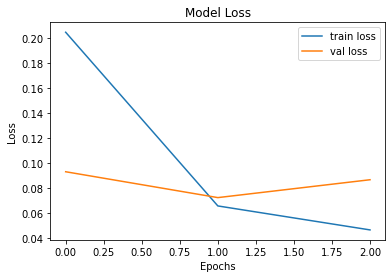

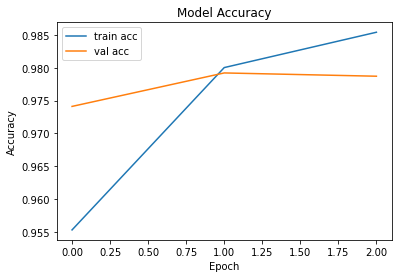

In [20]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
print(model.evaluate(test_img, test_lab_one_hot))

313/313 [==============================] - 5s 14ms/step - loss: 0.0867 - accuracy: 0.9787
[0.08671098202466965, 0.9786999821662903]


In [22]:
pred = model.predict(test_img[:5])
pred

array([[1.5560236e-10, 6.8815926e-19, 2.1414495e-10, 2.4609426e-09,
        1.3427891e-14, 5.5160194e-16, 1.4560443e-18, 1.0000000e+00,
        1.3783844e-10, 4.9930633e-11],
       [4.8452596e-11, 1.7395649e-06, 9.9915695e-01, 1.3364361e-11,
        2.4179144e-12, 2.2928862e-14, 8.4126409e-04, 1.9197998e-16,
        1.7954120e-09, 3.7528932e-18],
       [1.0276010e-09, 9.9974853e-01, 6.6214773e-07, 1.5800697e-10,
        2.4482780e-04, 5.3715791e-08, 4.1612921e-07, 1.3410634e-06,
        4.3178197e-06, 1.1665696e-09],
       [9.9999976e-01, 9.6617330e-15, 1.0245342e-08, 1.7004425e-13,
        2.7595948e-10, 8.7237724e-11, 1.5803275e-07, 1.7194395e-10,
        7.0241130e-10, 1.4336449e-07],
       [1.7157085e-10, 1.4418004e-11, 2.2744710e-10, 5.6481233e-15,
        1.0000000e+00, 2.6297405e-14, 9.2201463e-13, 1.1023715e-11,
        1.0033766e-10, 8.3002327e-11]], dtype=float32)

In [23]:
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:5])

[7 2 1 0 4]
[7 2 1 0 4]


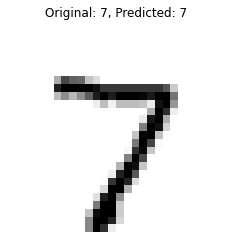

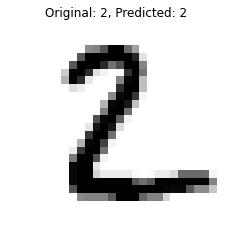

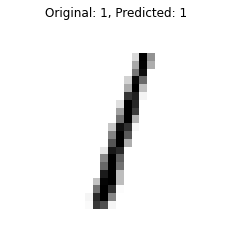

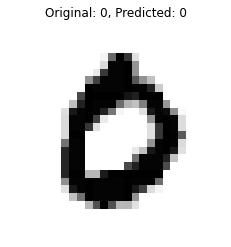

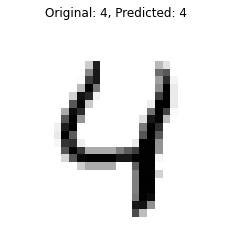

<Figure size 432x288 with 0 Axes>

In [24]:
#Visualizing prediction
for i in range(5):
  plt.imshow(test_img[i].reshape((28,28)), cmap='binary')
  plt.title("Original: {}, Predicted: {}".format(test_lab[i], p[i]))
  plt.axis("Off")
  plt.figure()